In [1]:
import pandas as pd # Cargamos las librerias que vamos a necesitar
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Leemos los datos y los mostramos
df = pd.read_csv('Prueba de conocimientos/Tabla de pagos.csv', skiprows=1) 
df = df.iloc[:, 1:]
df

,MONTO_CREDITO,SEXO,ESCOLARIDAD,ESTADO_CIVIL,EDAD,ESTADO_PAGO_SEP,ESTADO_PAGO_AGO,ESTADO_PAGO_JUL,ESTADO_PAGO_JUN,ESTADO_PAGO_MAY,...,ESTADO_CUENTA_JUN,ESTADO_CUENTA_MAY,ESTADO_CUENTA_ABR,MONTO_PAGO_SEP,MONTO_PAGO_AGO,MONTO_PAGO_JUL,MONTO_PAGO_JUN,MONTO_PAGO_MAY,MONTO_PAGO_ABR,INCUMPLIMIENTO_PAGO
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Buscar que variables son NaN
columns_NaN,types = [],[]
for i in df.columns:
    if df[i].isna().any():
        columns_NaN.append(i)
        types.append(df[i].dtype)
print(columns_NaN)

[]


Vemos que no hay datos nulos en esta tabla

In [4]:
# Separamos los datos en X y y
X = df.iloc[:,:-1] # Quitamos la variable INCUMPLIMIENTO_PAGO
y = df['INCUMPLIMIENTO_PAGO'] # Tomamos la variable INCUMPLIMIENTO_PAGO

In [5]:
# Dividimos los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify=y, random_state=1)

## Checar datos atípicos

Hacemos un describe de los datos y vemos cuáles tiene datos muy diferentes al resto, después para analizar cada variable por separado

In [6]:
X_train.describe()

,MONTO_CREDITO,SEXO,ESCOLARIDAD,ESTADO_CIVIL,EDAD,ESTADO_PAGO_SEP,ESTADO_PAGO_AGO,ESTADO_PAGO_JUL,ESTADO_PAGO_JUN,ESTADO_PAGO_MAY,...,ESTADO_CUENTA_JUL,ESTADO_CUENTA_JUN,ESTADO_CUENTA_MAY,ESTADO_CUENTA_ABR,MONTO_PAGO_SEP,MONTO_PAGO_AGO,MONTO_PAGO_JUL,MONTO_PAGO_JUN,MONTO_PAGO_MAY,MONTO_PAGO_ABR
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,...,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000
mean,167639.153333,1.604542,1.853333,1.551542,35.498958,-0.016500,-0.134125,-0.167250,-0.220375,-0.267292,...,4.692525e+04,43195.965375,40308.063000,38956.972625,5716.280458,6.026159e+03,5323.10925,4862.821208,4853.709833,5171.844083
std,129393.323386,0.488959,0.794784,0.522435,9.205978,1.122808,1.196117,1.193665,1.167740,1.129373,...,6.926033e+04,64137.989485,60691.609682,59634.889852,17076.209665,2.426275e+04,18341.10150,15857.457508,15831.502281,17165.507440
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.711750e+03,2356.500000,1782.750000,1270.750000,1000.000000,8.400000e+02,390.00000,300.000000,238.750000,108.750000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.011400e+04,19078.500000,18144.000000,17115.500000,2100.000000,2.011000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.995600e+04,54332.250000,50250.500000,49515.250000,5006.000000,5.000000e+03,4536.25000,4056.000000,4075.500000,4005.250000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Se puede ver que hay datos atípicos en varias variables, todas las variables a exepción de de las categóricas tiene valores atípicos, esto debido a que del 75% y el valor máximo es demasiado grande a comparación de el valor min hasta el 75%

In [7]:
# Aquí vamos a poner los ìndices de los renglones que vamos a quitar
index_rm = []
# Aquí separamos las variables en 3 categorias por simplicidad
ESTADO_PAGO = ['ESTADO_PAGO_SEP', 'ESTADO_PAGO_AGO', 'ESTADO_PAGO_JUL',
               'ESTADO_PAGO_JUN', 'ESTADO_PAGO_MAY', 'ESTADO_PAGO_ABR']
ESTADO_CUENTA =  ['ESTADO_CUENTA_SEP', 'ESTADO_CUENTA_AGO', 'ESTADO_CUENTA_JUL',
                   'ESTADO_CUENTA_JUN', 'ESTADO_CUENTA_MAY', 'ESTADO_CUENTA_ABR']
MONTO_PAGO = ['MONTO_PAGO_SEP', 'MONTO_PAGO_AGO', 'MONTO_PAGO_JUL', 'MONTO_PAGO_JUN',
               'MONTO_PAGO_MAY', 'MONTO_PAGO_ABR']

In [8]:
#  Se hace  un función para graficar el histograma de las variables y checar si hay valores atípicos
def hist_plot(colums_to_plot,df):
    fig, axes = plt.subplots(2, 3, figsize=(12, 6))
    axes = axes.flatten()
    for i, column in enumerate(colums_to_plot):
        axes[i].hist(df[column], bins=30, alpha=0.75)
        axes[i].set_title(column)
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

### MONTO_CREDITO

Se observa 20 valores mayores a 700000.0 que se podrían considerar atípicos para MONTO_CREDITO


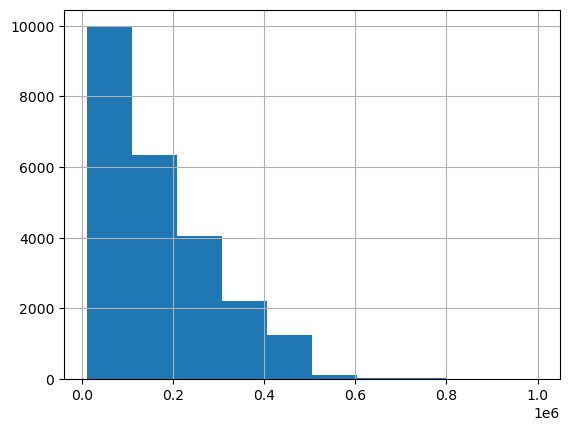

In [9]:
X_train['MONTO_CREDITO'].hist()
max_mon_cred = 0.7e6
print(f"Se observa {sum(X_train['MONTO_CREDITO']>max_mon_cred)} valores mayores a {max_mon_cred} que se podrían considerar atípicos para MONTO_CREDITO")
index_rm = index_rm+X_train[X_train['MONTO_CREDITO']>max_mon_cred].index.tolist()

### ESTADO_PAGO 

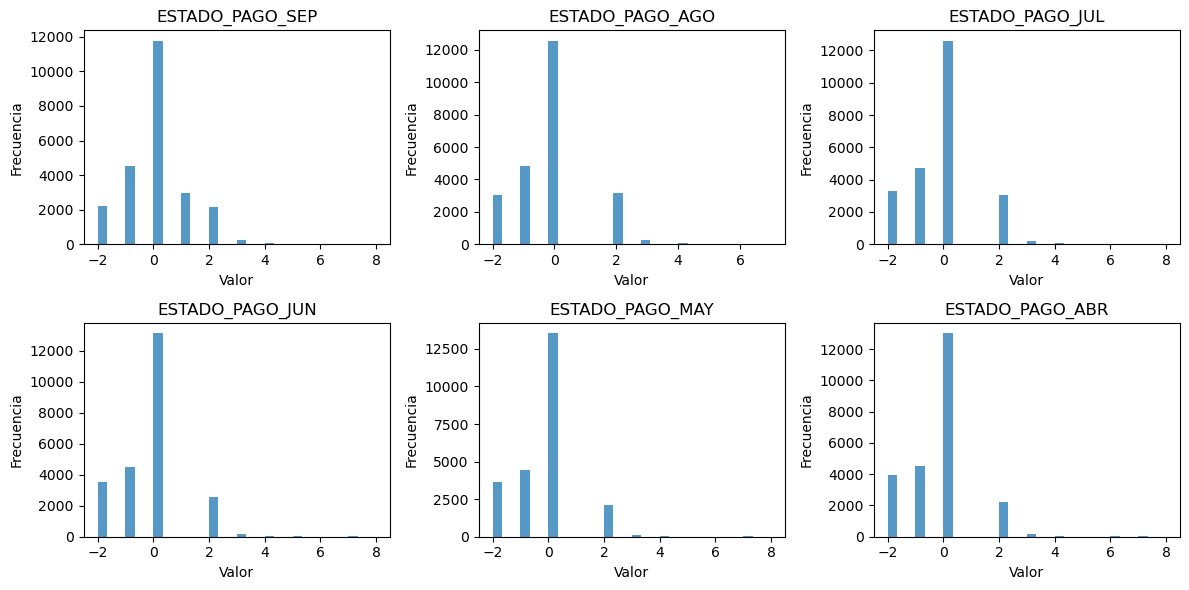

Se observa 20 valores mayores a 6 que se podrían considerar atípicos para ESTADO_PAGO_SEP
Se observa 14 valores mayores a 6 que se podrían considerar atípicos para ESTADO_PAGO_AGO
Se observa 20 valores mayores a 6 que se podrían considerar atípicos para ESTADO_PAGO_JUL
Se observa 41 valores mayores a 6 que se podrían considerar atípicos para ESTADO_PAGO_JUN
Se observa 42 valores mayores a 6 que se podrían considerar atípicos para ESTADO_PAGO_MAY
Se observa 33 valores mayores a 6 que se podrían considerar atípicos para ESTADO_PAGO_ABR


In [10]:
hist_plot(ESTADO_PAGO,X_train)
max_est_pago = 6
for var in ESTADO_PAGO:
    index_rm = index_rm+X_train[X_train[var]>max_est_pago].index.tolist()
    print(f"Se observa {sum(X_train[var]>max_est_pago)} valores mayores a {max_est_pago} que se podrían considerar atípicos para {var}")

### ESTADO_CUENTA

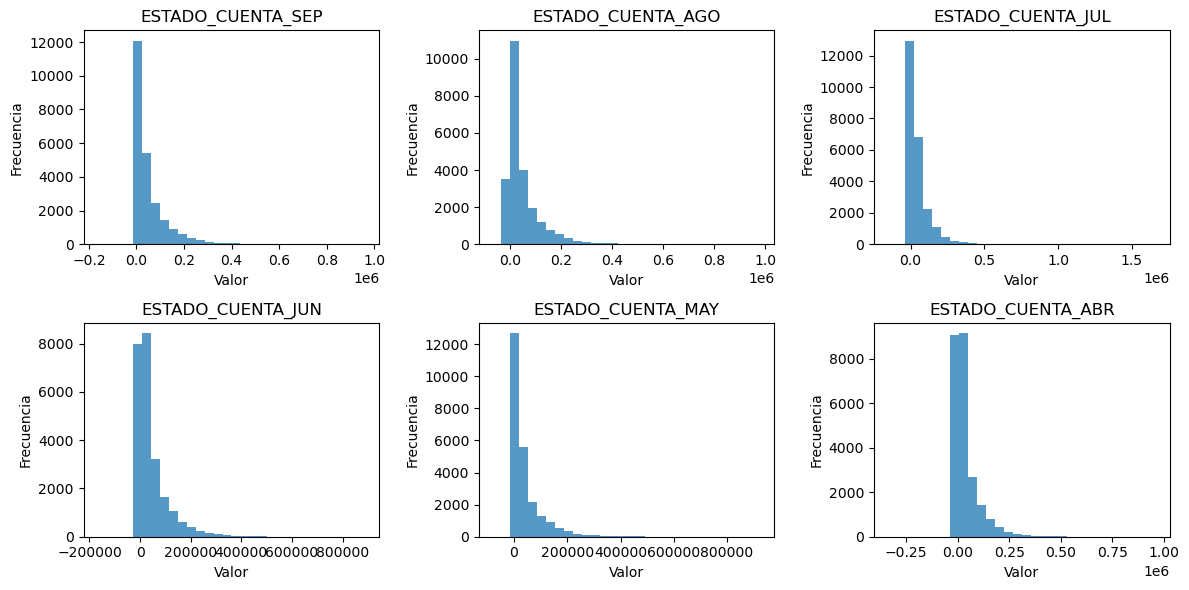

Se observa 76 valores mayores a 450000.0 que se podrían considerar atípicos para ESTADO_CUENTA_SEP
Se observa 62 valores mayores a 450000.0 que se podrían considerar atípicos para ESTADO_CUENTA_AGO
Se observa 59 valores mayores a 450000.0 que se podrían considerar atípicos para ESTADO_CUENTA_JUL
Se observa 38 valores mayores a 450000.0 que se podrían considerar atípicos para ESTADO_CUENTA_JUN
Se observa 30 valores mayores a 450000.0 que se podrían considerar atípicos para ESTADO_CUENTA_MAY
Se observa 25 valores mayores a 450000.0 que se podrían considerar atípicos para ESTADO_CUENTA_ABR
Se observa 19 valores menores a -4000 que se podrían considerar atípicos para ESTADO_CUENTA_SEP
Se observa 33 valores menores a -4000 que se podrían considerar atípicos para ESTADO_CUENTA_AGO
Se observa 40 valores menores a -4000 que se podrían considerar atípicos para ESTADO_CUENTA_JUL
Se observa 28 valores menores a -4000 que se podrían considerar atípicos para ESTADO_CUENTA_JUN
Se observa 43 valores 

In [11]:
hist_plot(ESTADO_CUENTA,X_train)
max_est_cuen = 4.5e5
for var in ESTADO_CUENTA:
    index_rm = index_rm+X_train[X_train[var]>max_est_cuen].index.tolist()
    print(f"Se observa {sum(X_train[var]>max_est_cuen)} valores mayores a {max_est_cuen} que se podrían considerar atípicos para {var}")
min_est_cuen = -4000
for var in ESTADO_CUENTA:
    index_rm = index_rm+X_train[X_train[var]<min_est_cuen].index.tolist()
    print(f"Se observa {sum(X_train[var]<min_est_cuen)} valores menores a {min_est_cuen} que se podrían considerar atípicos para {var}")

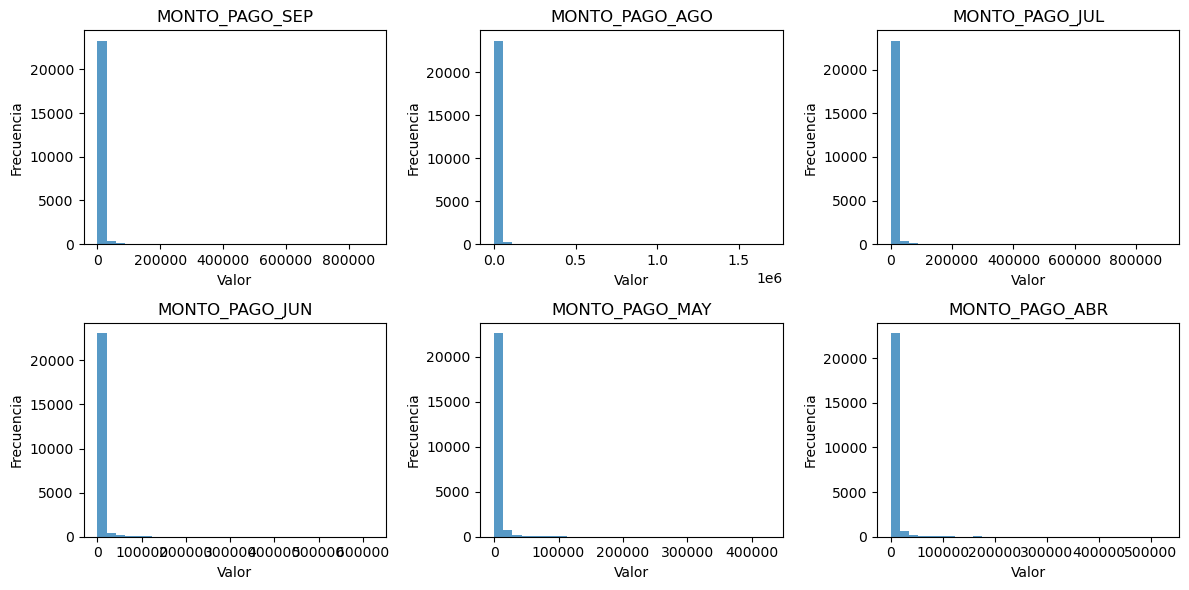

Se observa 66 valores mayores a 150000.0 que se podrían considerar atípicos para MONTO_PAGO_SEP
Se observa 80 valores mayores a 150000.0 que se podrían considerar atípicos para MONTO_PAGO_AGO
Se observa 64 valores mayores a 150000.0 que se podrían considerar atípicos para MONTO_PAGO_JUL
Se observa 57 valores mayores a 150000.0 que se podrían considerar atípicos para MONTO_PAGO_JUN
Se observa 66 valores mayores a 150000.0 que se podrían considerar atípicos para MONTO_PAGO_MAY
Se observa 94 valores mayores a 150000.0 que se podrían considerar atípicos para MONTO_PAGO_ABR


In [12]:
hist_plot(MONTO_PAGO,X_train)
max_mon_pago = 1.5e5
for var in MONTO_PAGO:
    index_rm = index_rm+X_train[X_train[var]>max_mon_pago].index.tolist()
    print(f"Se observa {sum(X_train[var]>max_mon_pago)} valores mayores a {max_mon_pago} que se podrían considerar atípicos para {var}")

In [13]:
# Se obtiene los índices sin repetir
index_rm = list(set(index_rm))

In [14]:
# Quitamos los datos atípicos, debido a que no son muchos
X_train_rm = X_train.drop(index_rm)
y_train_rm = y_train.drop(index_rm)

### Variables dummies 

In [15]:
# Definimos las columnas que son categóricas
columns_strin = ['SEXO', 'ESCOLARIDAD', 'ESTADO_CIVIL']

In [16]:
# Hacemos una variable auxiliar 
X_train_rm_aux = X_train_rm

# Aplicamos one-hot enconder a los datos categóricos
for i in columns_strin:
    X_train_rm_aux = pd.get_dummies(X_train_rm_aux, columns=[i],dtype=float)

In [17]:
# Hacemos una variable auxiliar 
X_test_aux = X_test
## aplicamos dummies
for i in columns_strin:
    X_test_aux = pd.get_dummies(X_test_aux, columns=[i],dtype=float)

# Modelos

La variable $y$ es una variable binaria, es decir, solo toma 2 valores, por lo cual existen gran variedad de algoritmos que pueden resolver este problema. Los que voy a usar yo, van a ser Random Forest, Decision Tree, GradienteBoosting, Neural Networks y XGBoost. Estos algoritmos me van a ayudar a poder hacer un  predicción de los clientes.

In [18]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier

### RandomForestRegressor

Precisión (accuracy) de RandomForestRegressor: 0.8111666666666667
recall score de RandomForestRegressor: 0.3707611152976639
precision score de RandomForestRegressor: 0.6227848101265823
f1score de RandomForestRegressor: 0.4648086915446386
roc auc score de RandomForestRegressor: 0.6534952591253995


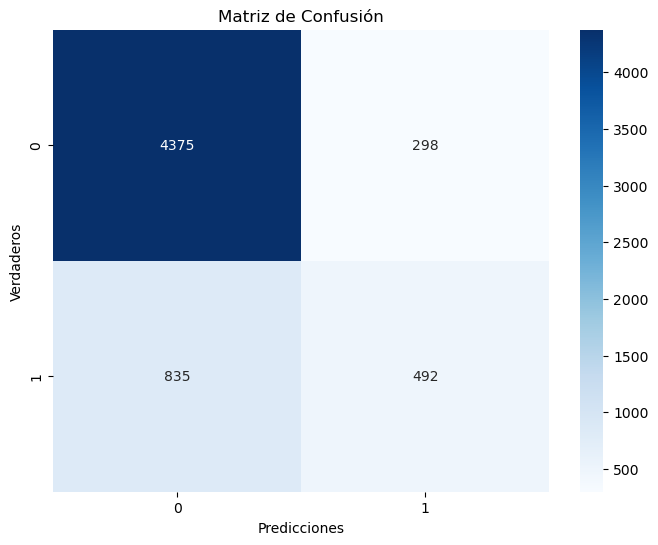

In [19]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train_rm_aux, y_train_rm)

y_pred_rf = rf_model.predict(X_test_aux)
y_pred_rf = np.round(y_pred_rf)
print("Precisión (accuracy) de RandomForestRegressor:", accuracy_score(y_test, y_pred_rf))
print("recall score de RandomForestRegressor:", recall_score(y_test, y_pred_rf))
print("precision score de RandomForestRegressor:", precision_score(y_test, y_pred_rf))
print("f1score de RandomForestRegressor:", f1_score(y_test, y_pred_rf))
print("roc auc score de RandomForestRegressor:", roc_auc_score(y_test, y_pred_rf))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

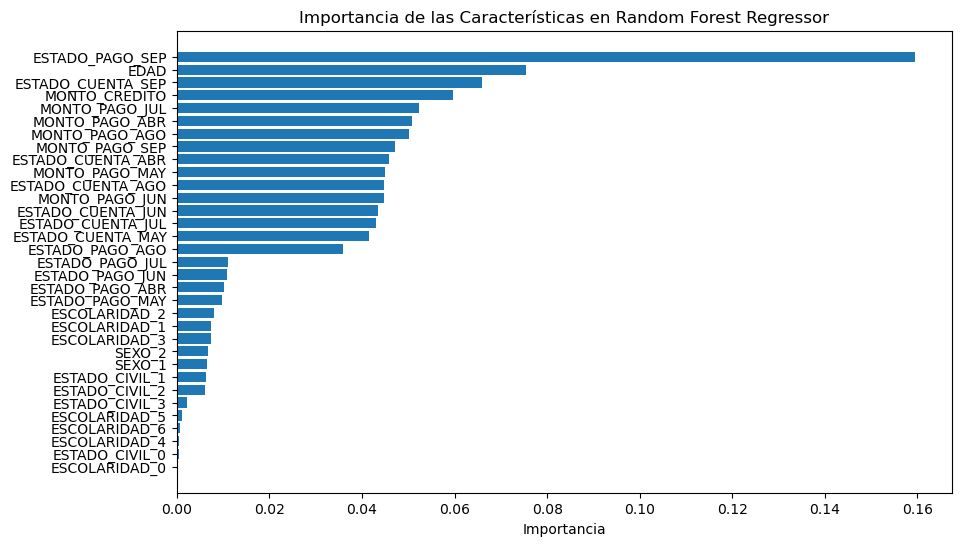

In [20]:
# Sacamos las características
feature_importances = rf_model.feature_importances_

# Ordemos 
fi_sort,col_sort  = zip(*sorted(list(zip(feature_importances,X_train_rm_aux.columns))))

plt.figure(figsize=(10, 6))
plt.barh(list(col_sort), list(fi_sort))
plt.xlabel('Importancia')
plt.title('Importancia de las Características en Random Forest Regressor')
plt.show()

### DecisionTreeRegressor

Precisión (accuracy) de DecisionTreeRegressor: 0.7158333333333333
recall score de DecisionTreeRegressor: 0.40617935192162774
precision score de DecisionTreeRegressor: 0.3701923076923077
f1score de DecisionTreeRegressor: 0.3873517786561265
roc auc score de DecisionTreeRegressor: 0.6049728345313252


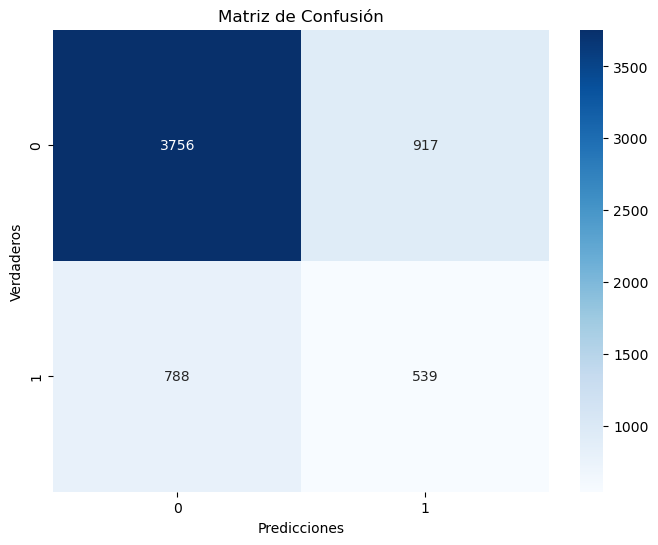

In [21]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_rm_aux, y_train_rm)

y_pred_dt = dt_model.predict(X_test_aux)

print("Precisión (accuracy) de DecisionTreeRegressor:", accuracy_score(np.round(y_test), np.round(y_pred_dt)))
print("recall score de DecisionTreeRegressor:", recall_score(np.round(y_test), np.round(y_pred_dt)))
print("precision score de DecisionTreeRegressor:", precision_score(np.round(y_test), np.round(y_pred_dt)))
print("f1score de DecisionTreeRegressor:", f1_score(np.round(y_test), np.round(y_pred_dt)))
print("roc auc score de DecisionTreeRegressor:", roc_auc_score(np.round(y_test), np.round(y_pred_dt)) )

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(np.round(y_test), np.round(y_pred_dt)), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

### GradientBoostingRegressor

Precisión (accuracy) de GradientBoostingRegressor: 0.82
recall score de GradientBoostingRegressor: 0.35342878673700073
precision score de GradientBoostingRegressor: 0.678726483357453
f1score de GradientBoostingRegressor: 0.46481665014866197
roc auc score de GradientBoostingRegressor: 0.6529609159450036


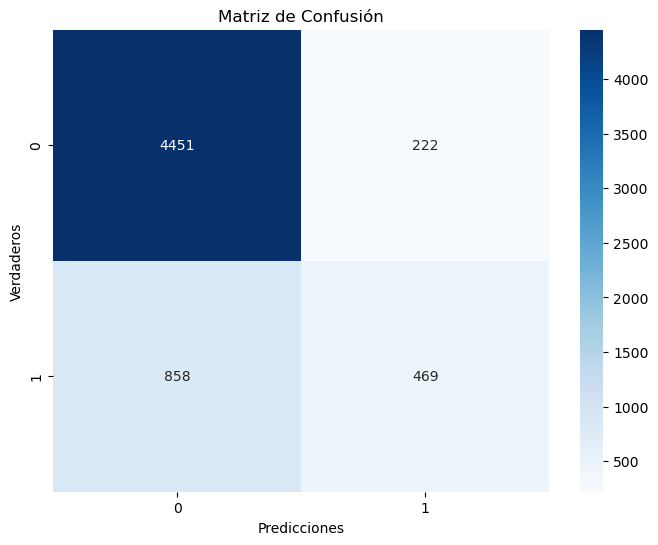

In [22]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train_rm_aux, y_train_rm)

y_pred_gb = np.round(gb_model.predict(X_test_aux))

print("Precisión (accuracy) de GradientBoostingRegressor:", accuracy_score(y_test, y_pred_gb))
print("recall score de GradientBoostingRegressor:", recall_score(y_test, y_pred_gb))
print("precision score de GradientBoostingRegressor:", precision_score(y_test, y_pred_gb))
print("f1score de GradientBoostingRegressor:", f1_score(y_test, y_pred_gb))
print("roc auc score de GradientBoostingRegressor:", roc_auc_score(y_test, y_pred_gb))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

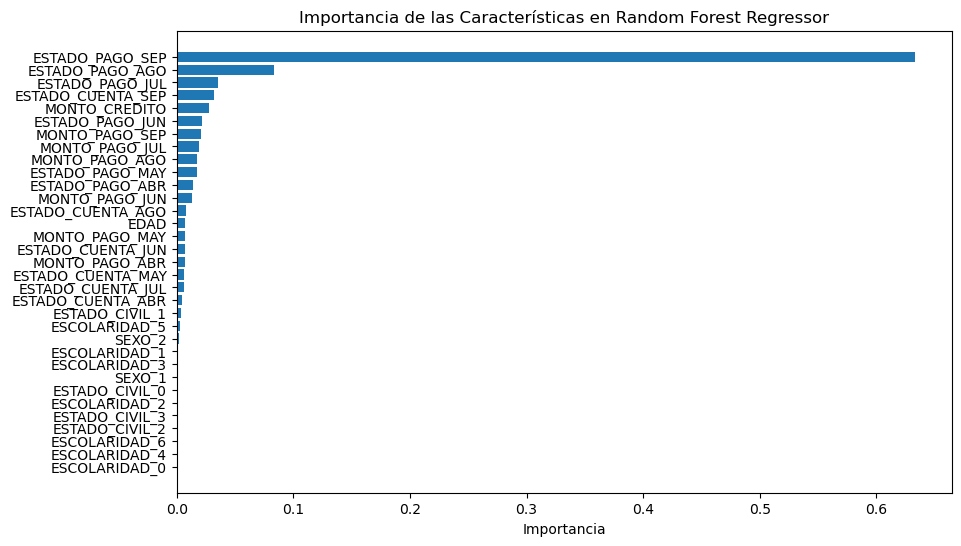

In [23]:
# Sacamos las características
feature_importances_1 = gb_model.feature_importances_

# Ordemos 
fi_sort,col_sort  = zip(*sorted(list(zip(feature_importances_1,X_train_rm_aux.columns))))

plt.figure(figsize=(10, 6))
plt.barh(list(col_sort), list(fi_sort))
plt.xlabel('Importancia')
plt.title('Importancia de las Características en Random Forest Regressor')
plt.show()

### Redes Neuronales

In [29]:
# Crear el modelo de red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train_rm_aux.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Dekel Black\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
history = model.fit(X_train_rm_aux, y_train_rm, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6825 - loss: 747.4233 - val_accuracy: 0.7726 - val_loss: 87.3852
Epoch 2/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6951 - loss: 93.0636 - val_accuracy: 0.7745 - val_loss: 157.7453
Epoch 3/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6932 - loss: 84.0498 - val_accuracy: 0.7694 - val_loss: 42.2887
Epoch 4/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6958 - loss: 63.6904 - val_accuracy: 0.7696 - val_loss: 69.3718
Epoch 5/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6934 - loss: 66.0947 - val_accuracy: 0.5518 - val_loss: 41.6401
Epoch 6/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6939 - loss: 55.3070 - val_accuracy: 0.7734 - val_loss: 30.3778
Epoch 7/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7072 - loss: 34.8879 - val_accuracy: 0.7717 - val_loss: 16.5318
Epoch 8/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6988 - loss: 2

Epoch 51/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7180 - loss: 1.0865 - val_accuracy: 0.7634 - val_loss: 0.9023
Epoch 52/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7419 - loss: 0.6629 - val_accuracy: 0.7722 - val_loss: 1.1576
Epoch 53/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7389 - loss: 0.6536 - val_accuracy: 0.7730 - val_loss: 0.9945
Epoch 54/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7616 - loss: 0.6071 - val_accuracy: 0.7717 - val_loss: 0.9488
Epoch 55/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7355 - loss: 0.7482 - val_accuracy: 0.7743 - val_loss: 1.0327
Epoch 56/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7626 - loss: 0.6060 - val_accuracy: 0.7722 - val_loss: 0.9501
Epoch 57/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7605 - loss: 0.5923 - val_accuracy: 0.7726 - val_loss: 1.0482
Epoch 58/100
292/292 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7543 - loss: 0.6246 - 

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step
Accuracy: 0.7775


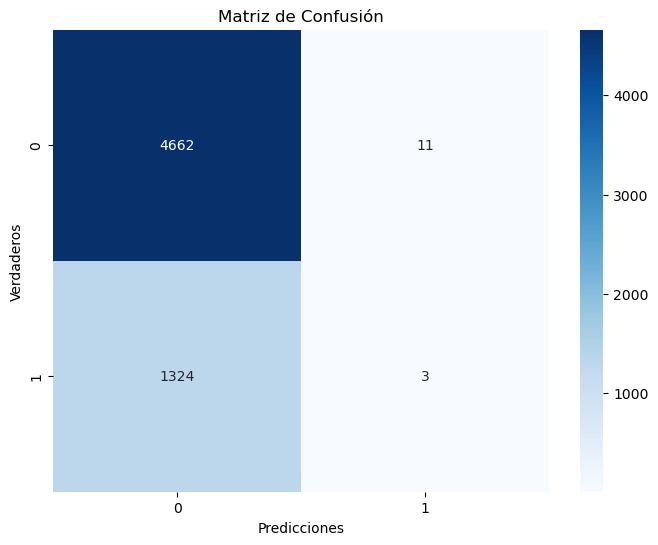

In [31]:
# Evaluar el modelo
y_pred = (model.predict(X_test_aux) > 0.5).astype("int32")
print("Accuracy:", accuracy_score(y_test, y_pred))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

### XGBClassifier

Precisión (accuracy) de GradientBoostingRegressor: 0.8138333333333333
recall score de GradientBoostingRegressor: 0.37980406932931426
precision score de GradientBoostingRegressor: 0.631578947368421
f1score de GradientBoostingRegressor: 0.4743529411764706
roc auc score de GradientBoostingRegressor: 0.6584447267254319


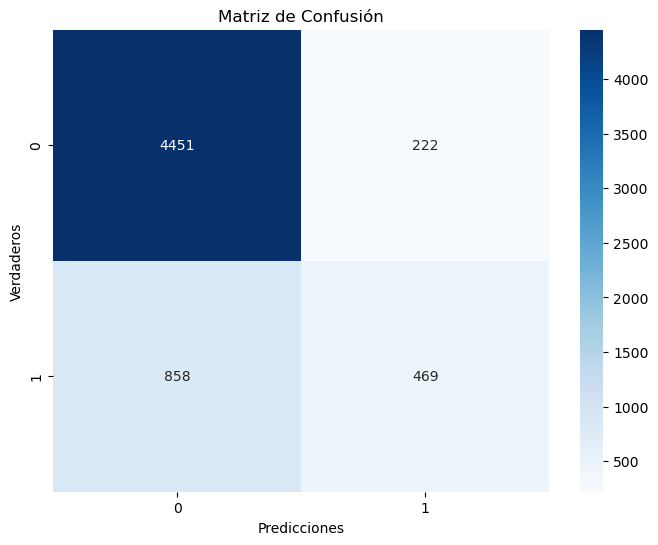

In [27]:
model_xg = XGBClassifier()
model_xg.fit(X_train_rm_aux, y_train_rm)
y_pred = model_xg.predict(X_test_aux)

print("Precisión (accuracy) de GradientBoostingRegressor:", accuracy_score(y_test, y_pred))
print("recall score de GradientBoostingRegressor:", recall_score(y_test, y_pred))
print("precision score de GradientBoostingRegressor:", precision_score(y_test, y_pred))
print("f1score de GradientBoostingRegressor:", f1_score(y_test, y_pred))
print("roc auc score de GradientBoostingRegressor:", roc_auc_score(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True,
            fmt="d", cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()

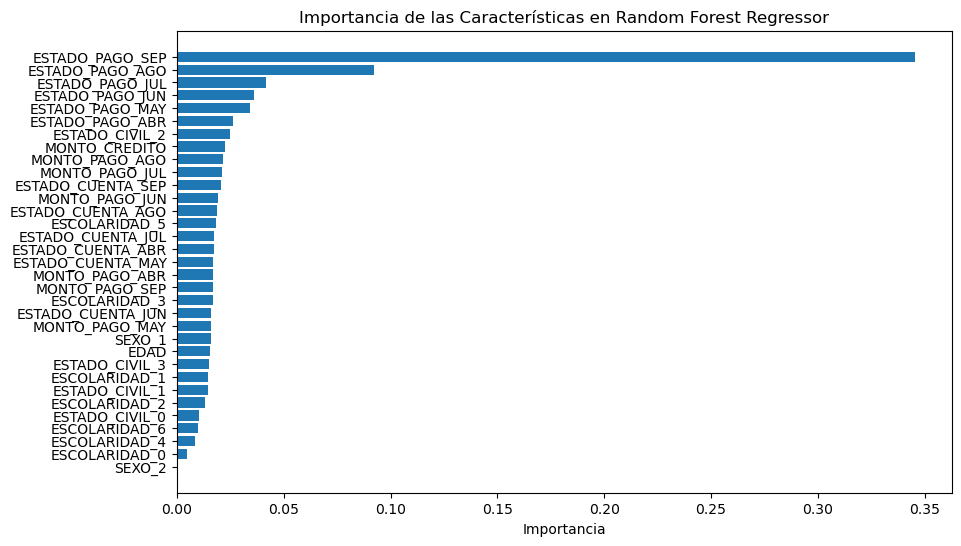

In [28]:
# Sacamos las características
feature_importances_2 = model_xg.feature_importances_

# Ordemos 
fi_sort,col_sort  = zip(*sorted(list(zip(feature_importances_2,X_train_rm_aux.columns))))

plt.figure(figsize=(10, 6))
plt.barh(list(col_sort), list(fi_sort))
plt.xlabel('Importancia')
plt.title('Importancia de las Características en Random Forest Regressor')
plt.show()

Los modelos que me dieron mejor accuracy fue Random Forest Regresor, Gradiente Boosting Regressor y XGBoost Classifier. Estamos modelos me dieron una acc de aproximadamente 0.82. También se obtuvieron las características de estos modelos y los 3 dieron que la variable que más importa al momento de decidir fue la de ESTADO_PAGO_SEP. De ahí cada una ya tiene diferentes importancias. Por el contrario, las variables que menos importan son el estado civil, escoladridad y el sexo de la persona, estas variables apenas y tiene relevancia para los modelos, es decir, no se comparan con los que tiene mayor importancia. Los otros modelos dieron un acc menor que estos, aunque la diferencia no es mucha.